In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#colors
wal_color = '#00b4d8'
five_color = ['#3c1642','#086375','#1dd3b0','#affc41','#b2ff9e']

# Análisis de compañias retail en Estados Unidos

In [3]:
df = pd.read_csv('/home/sebasgrande/DocumentosSebas/platzi/Data_scientis/projects/us_retails/largest_ust.csv')
df

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
0,Walmart US,658119,4574.0,65.649725,0.012843,Supercenters
1,Kroger,115037,3931.0,30.031850,0.053887,Grocery
2,Costco,90048,495.0,187.795620,0.066810,Warehouse Club
3,Home Depot,83976,1965.0,42.735878,0.000000,Home Improvement
4,Walgreen Boots,78924,8002.0,9.810927,-0.010511,Drug Stores
5,CVS incl. Target,77792,9813.0,8.825959,0.255662,Drug Stores
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
7,Target,71208,1772.0,39.982033,-0.010056,Supercenters
8,Lowe's,60311,1828.0,33.311792,0.019520,Home Improvement
9,Albertsons,56829,2326.0,23.877731,-0.044371,Grocery


# ¿Por qué hay tiendas con valores nulos?

In [4]:
df[df['Stores'].isnull()]

,Company,Sales,Stores,Sales/Avg. Store,Store Count Growth,Category
6,Amazon,71687,NaN,NaN,NaN,Electronic/Mail Order
11,Apple incl. Online,37664,NaN,NaN,NaN,NaN


- Amazon y apple incl son negocios que funcionan con sin locales fisicos por ello, tenemos sus respectivas variables con valores nulos

# Conozcamos un poco acerca de las ventas:

In [5]:
df_sales = df.sort_values(ascending=False,by='Sales')



## Walmart como el mayor vendedor

Walmart es el negocio que más ventas tiene en este mercado. Sin embargo, me gustaría despues analizar las ventas de los otros negocios sin que se vean afectadas por los números de walmart. 

### Walmart tiene el mayor numero de ventas:

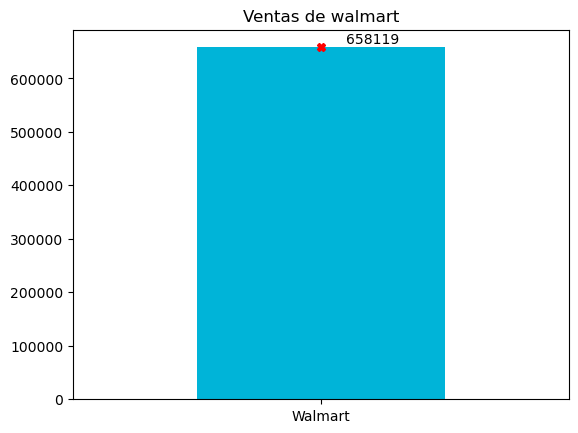

In [6]:
#table plot
fig, ax = plt.subplots()
df[df['Company']=='Walmart US'].Sales.plot(kind='bar',color=wal_color)

#xplot
x = df[df['Company']=='Walmart US'].Sales
plt.plot(x,'X',color='red')
ax.text(0.050,665000,'658119')

#out
ax.set_xticklabels(['Walmart'],rotation=360)
plt.title('Ventas de walmart')

plt.show()


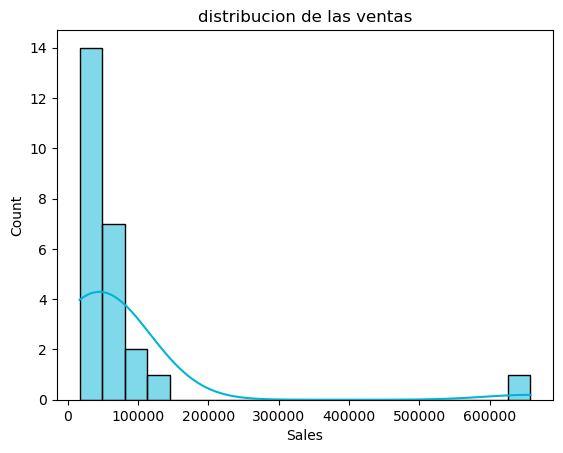

In [7]:
sns.histplot(df_sales,x='Sales',color=wal_color,kde=True)
plt.title('distribucion de las ventas')
plt.show()

- En la gráfica anterior se ve claramente como walmart arrasa en ventas 

## Promedio de ventas con walmart

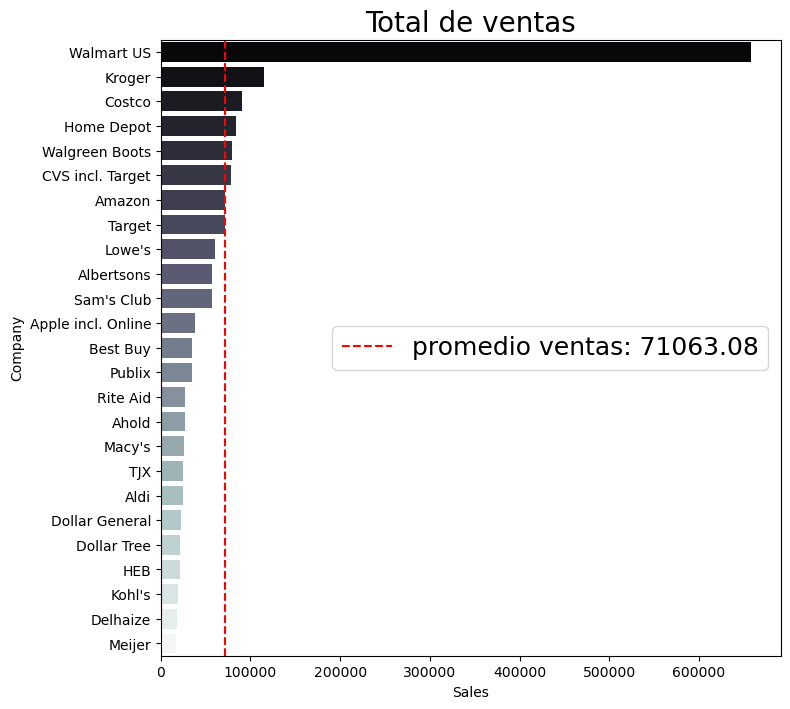

In [8]:
promedio = df_sales.Sales.mean()
plt.figure(figsize=(8,8))
sns.barplot(data=df_sales,x='Sales',y='Company',palette='bone')
plt.title('Total de ventas',fontsize=20)
plt.axvline(x=df_sales.Sales.mean(),linestyle='dashed',color='red',label=f'promedio ventas: {promedio}')
plt.legend(loc='center right',fontsize=18)
plt.show()


## Análisis sin walmart

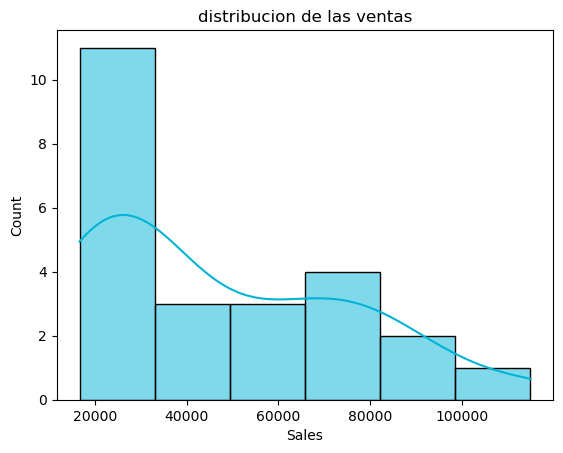

In [9]:
sns.histplot(df_sales[1:25],x='Sales',color=wal_color,kde=True)
plt.title('distribucion de las ventas')
plt.show()

## promedio de ventas

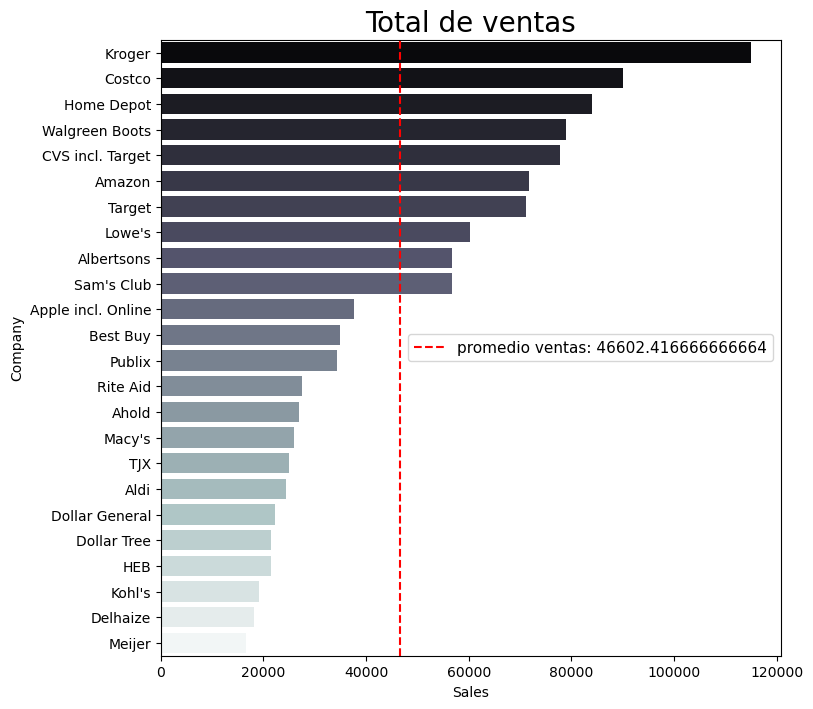

In [10]:
promedio = df_sales[1:25].Sales.mean()
plt.figure(figsize=(8,8))
sns.barplot(data=df_sales[1:25],x='Sales',y='Company',palette='bone')
plt.title('Total de ventas',fontsize=20)
plt.axvline(x=df_sales[1:25].Sales.mean(),linestyle='dashed',color='red',label=f'promedio ventas: {promedio}')
plt.legend(loc='center right',fontsize=11)
plt.show()

- Vemos que el promedio de ventas entre todas las tiendas si quitamos a walmart se reduce.

- Esto es debido a que cuando tenemos valores outliers, afectan el promedio de los datos en general.

### ¿Cuales son los 5 negocios que tienen mayores ventas ?

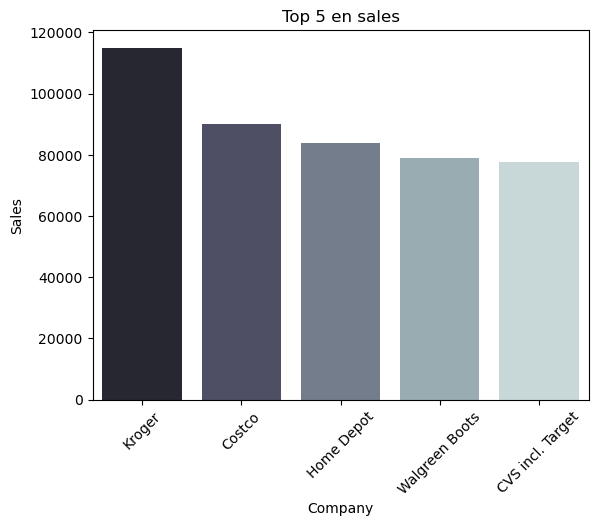

In [11]:
sns.barplot(data = df_sales[1:6], x='Company',y='Sales',palette='bone')
plt.xticks(rotation=45)
plt.title('Top 5 en sales')
plt.show()

In [12]:
df_sales.iloc[1:6,0:2]

,Company,Sales
1,Kroger,115037
2,Costco,90048
3,Home Depot,83976
4,Walgreen Boots,78924
5,CVS incl. Target,77792


- En el top ventas, las compañias tienen valores cercanos.

# ¿Cuáles son las categorías que existen y cómo es su proporción?

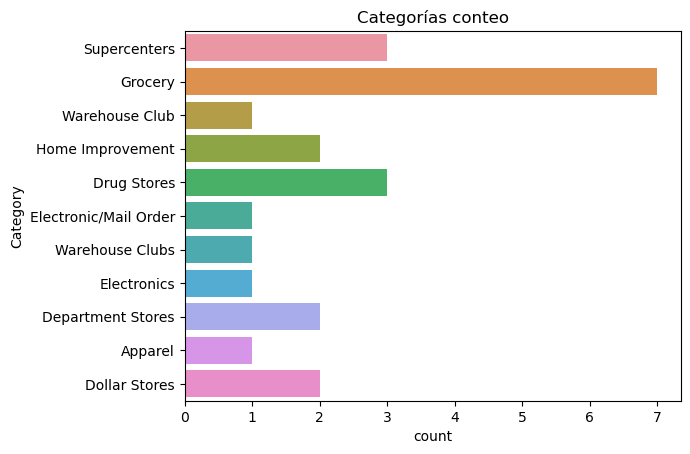

In [13]:
sns.countplot(data=df,y='Category')
plt.title("Categorías conteo")
plt.show()

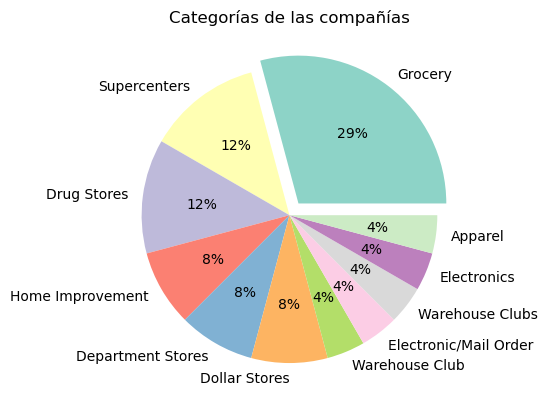

In [14]:
labels = []
values = []
myexplode = [0.1,0,0,0,0,0,0,0,0,0,0]
for i,j in dict(df.Category.value_counts()).items():
    labels.append(i)
    values.append(j)

#define Seaborn color palette to use
colors = sns.color_palette('Set3')
plt.pie(values,labels=labels,colors=colors,autopct='%.0f%%',explode=myexplode)
plt.title('Categorías de las compañías')
plt.show()

- La categoría más representativa en nuestros datos es Grocery. 

- Muy pocas compañías se orientan a Electronica y tecnología.

# Adentremonos a conocer más sobre la cantidad de tiendas

In [15]:
df_stores = df.sort_values(ascending=False,by='Stores')

## Compañía con mayor número de tiendas

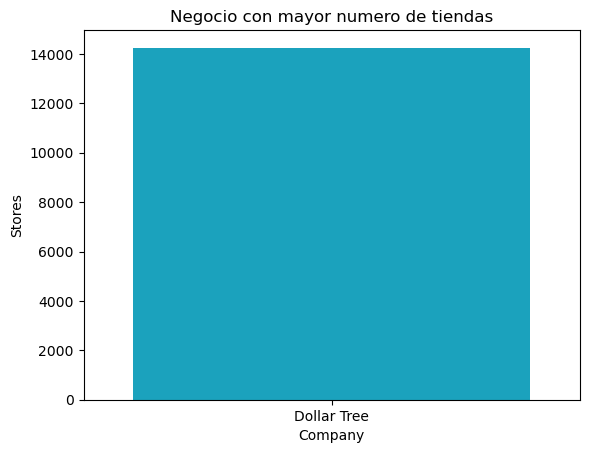

In [16]:
sns.barplot(data=df_stores[0:1],x='Company',y='Stores',color=wal_color)
plt.title("Negocio con mayor numero de tiendas")
plt.show()

## ¿ Cómo están todas las compañias en locales ?

Text(0.5, 1.0, 'numero de tiendas x locales')

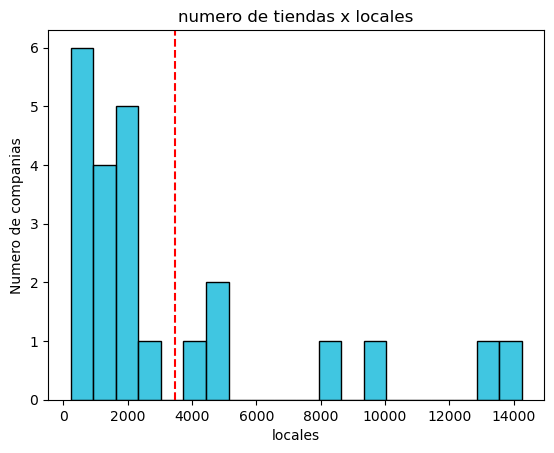

In [17]:
sns.histplot(df_stores,x='Stores',bins=20,color=wal_color)
plt.axvline(x=df_stores.Stores.mean(),color='red',linestyle='dashed')
plt.ylabel('Numero de companias')
plt.xlabel('locales')
plt.title('numero de tiendas x locales')

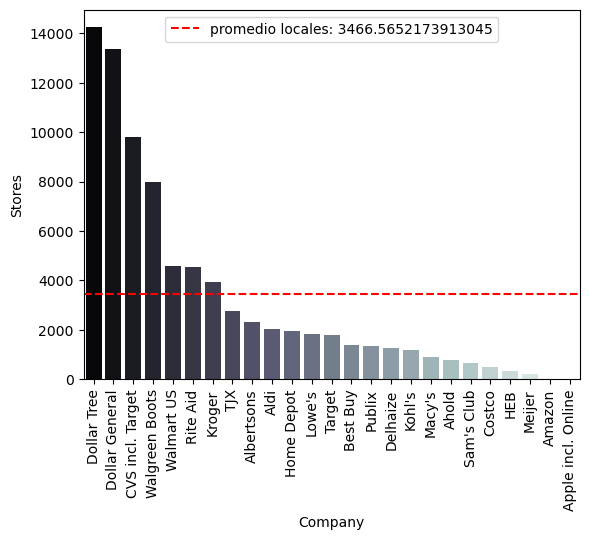

In [18]:
promedio_tiendas = df_stores.Stores.mean()
sns.barplot(df_stores,y='Stores',x='Company',palette='bone')
plt.xticks(rotation= 90)
plt.axhline(y=df_stores.Stores.mean(),color='red',linestyle='dashed',label=f'promedio locales: {promedio_tiendas}')
plt.legend()
plt.show()

## ¿Qué compañias estan en el top de mayor número de tiendas y mayor número de ventas?

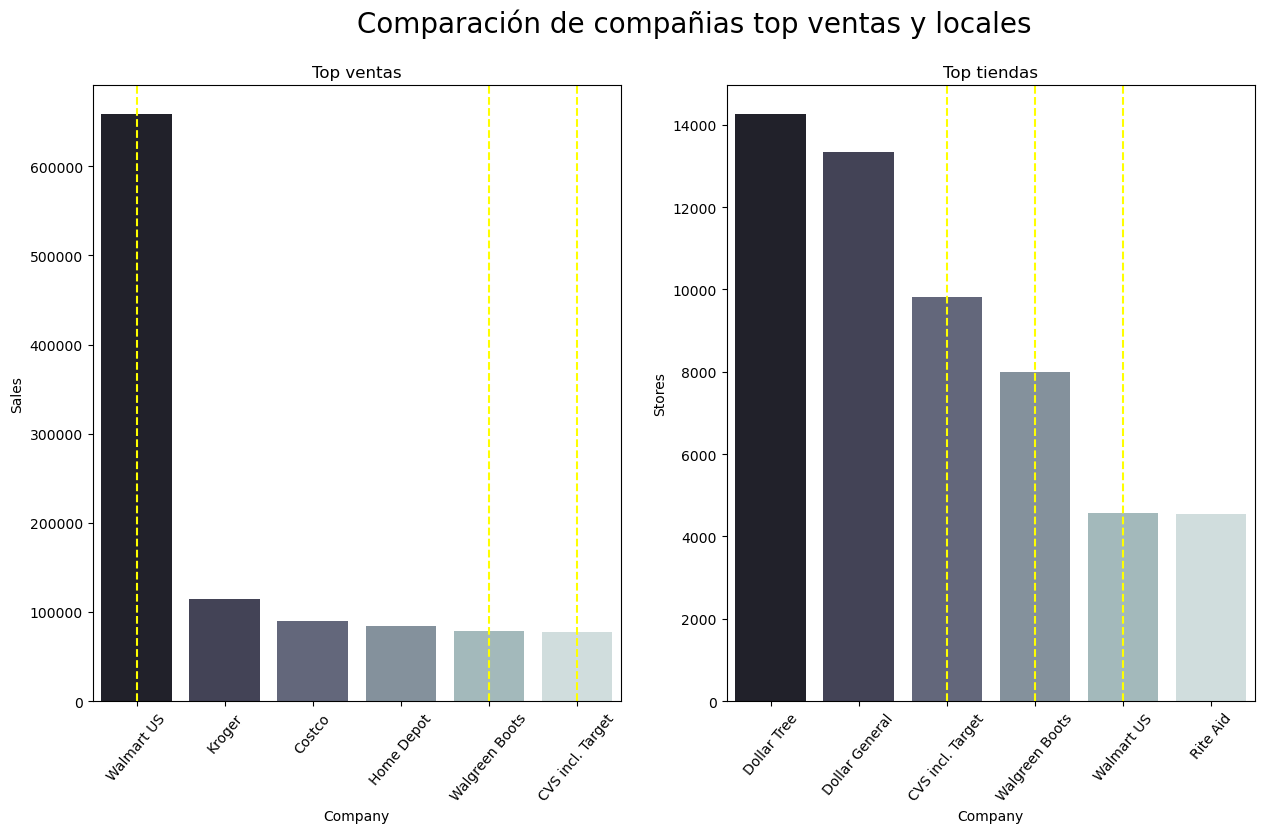

In [19]:
labels = df_sales[0:6].Company
labels2 = df_stores[0:6].Company
fig = plt.figure(figsize=(15,8))
gs = fig.add_gridspec(1,2)
gs.update(wspace = 0.2,hspace = 1)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])


#title
ax0.text(2.5,750000,'Comparación de compañias top ventas y locales',fontsize=20)

#ax0
sns.barplot(data = df_sales[0:6], x='Company',y='Sales',palette='bone',ax=ax0)
ax0.set_xticklabels(labels, rotation = 50)
ax0.set_title('Top ventas')
ax0.axvline(x=0,color='yellow',linestyle='dashed')
ax0.axvline(x=4,color='yellow',linestyle='dashed')
ax0.axvline(x=5,color='yellow',linestyle='dashed')

#ax1
sns.barplot(data = df_stores[0:6], x='Company',y='Stores',palette='bone',ax=ax1)
ax1.set_xticklabels(labels2, rotation = 50)
ax1.set_title('Top tiendas')
ax1.axvline(x=2,color='yellow',linestyle='dashed')
ax1.axvline(x=3,color='yellow',linestyle='dashed')
ax1.axvline(x=4,color='yellow',linestyle='dashed')
plt.show()


- Vemos que las compañías Walmart US, Walgreen Boots y Cvs incl. Comparten ambos tops. 

- Esto podría significar que la cantidad de locales influya en las ventas.

# ¿La cantidad de locales influye en las ventas?

Sería lógico pensar que a mayor número de tiendas, las compañías tendrían mayores ventas, pero observemos qué tan cierto es este anunciado.

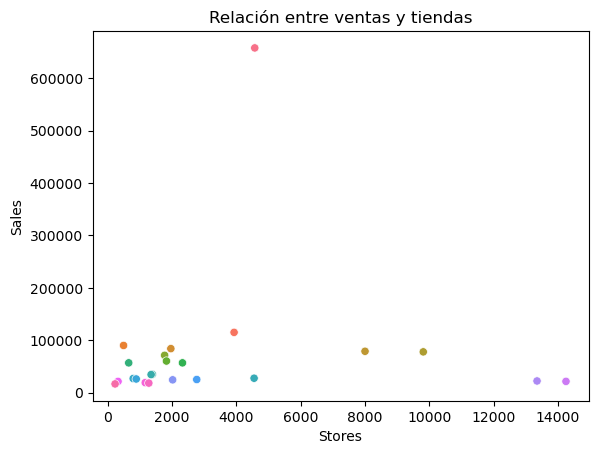

In [20]:
sns.scatterplot(df_sales,x='Stores',y='Sales',hue='Company')
plt.title('Relación entre ventas y tiendas')
plt.legend().remove()
plt.show()

- Como vemos, no hay una correlación entre tener una gran cantidad de tiendas y vender más.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c5419130-7ba8-4212-a034-ba21b597e32b' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>